# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [19]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

#modulo de pandas
import pandas as pd

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [20]:
# Cargar datos
# X, y = data[:, 0:8], data[:, 8]
#X_train, y_train = data[:700, 0:8], data[:700, 8]
#X_test, y_test = data[700:, 0:8], data[700:, 8]

# Cargar datos
ruta_archivo = 'C:/Users/Manuel/Desktop/SIS420/Laboratorios/Lab2/dataset_plants2.csv'

# Leer datos
data = pd.read_csv(ruta_archivo, delimiter=',') #agregue
print('Cantidad de datos:')
print(data.shape)

print(data)

X = data.iloc[:, 0:12]  # Selecciona las primeras 12 columnas para las características
y = data.iloc[:, 12]  

#X = X_train
#y = y_train
print(X)

print('columna de y:')
print(y)

Cantidad de datos:
(23100, 13)
       Humedad_Suelo  Cantidad_Luz  pH_Suelo  Temperatura  Nivel_Fertilizante  \
0          52.928810      2.311578  4.755279    24.370716           46.337959   
1          62.911362      5.305338  3.699277    10.190008           35.571374   
2          56.165803      5.305340  5.018660    28.210874           12.322256   
3          52.692991      5.943108  3.722044    24.244173           22.939882   
4          45.419288      4.160941  8.617844    24.058742           17.994179   
...              ...           ...       ...          ...                 ...   
23095      54.349447      6.410908  8.448130    31.278619           41.896572   
23096      35.310256      6.821160  8.157394    27.256309            2.608973   
23097      69.488893      3.746046  6.557157    23.962508           13.338819   
23098      38.764683      9.596214  7.175161    17.811348           18.542399   
23099      39.570303      9.875310  3.712752    16.637785           36.021108 

In [21]:
data.head(4)

,Humedad_Suelo,Cantidad_Luz,pH_Suelo,Temperatura,Nivel_Fertilizante,Tipo_Planta,Edad_Planta,Tamaño_Planta,Nivel_Pesticidas,Calidad_Aire,Frecuencia_Riego,Días_Último_Tratamiento,Estado_Planta
0,52.928810,2.311578,4.755279,24.370716,46.337959,2,25,95.102245,13.665930,9.816439,1,29,0
1,62.911362,5.305338,3.699277,10.190008,35.571374,1,25,38.430746,7.459307,1.010680,4,7,0
2,56.165803,5.305340,5.018660,28.210874,12.322256,5,10,20.332484,0.818354,6.165716,4,27,0
3,52.692991,5.943108,3.722044,24.244173,22.939882,2,14,111.966643,9.790885,4.360190,3,15,1


### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [22]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [23]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [24]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [25]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [26]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [27]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [28]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [29]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.00623516 -0.00230293 -0.00948667  0.00137512  0.01892884  0.00510893
 -0.00104587  0.01663169 -0.00315895  0.0110089   0.01270007  0.00320234
 -0.00040103]


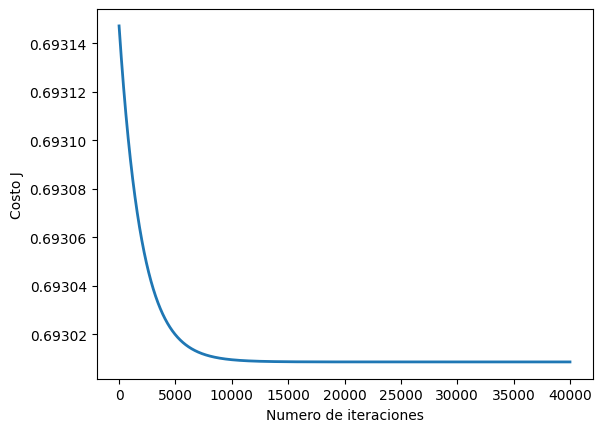

In [38]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 40000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [39]:
#definir x_test 
#Se esta toamndo el 20% de los datos para test y el 80% para entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(X_test)
print('----------------------------------------------------------------------------------')
print(theta)

[[ 1.         -0.77423479  1.39245941 ...  1.27424201  1.47437518
   0.17149526]
 [ 1.          0.36339778  0.81205251 ... -0.35526474  0.8888631
   0.40274508]
 [ 1.         -0.70560502  1.2963861  ... -0.11925155 -1.45318521
  -1.44725346]
 ...
 [ 1.          0.01245829  0.80149454 ...  1.25068592 -1.45318521
   0.74961981]
 [ 1.         -0.3731095  -0.15984146 ...  1.07018479 -0.86767314
   1.55899417]
 [ 1.          0.94913167  0.65493707 ... -1.48430488  1.47437518
   1.09649453]]
----------------------------------------------------------------------------------
[-0.00623516 -0.00230293 -0.00948667  0.00137512  0.01892884  0.00510893
 -0.00104587  0.01663169 -0.00315895  0.0110089   0.01270007  0.00320234
 -0.00040103]


In [16]:
#X_test, y_test = data[700:, 0:8], data[700:, 8]
#print(X_test)

In [56]:

X_array = [54,3,3.4,13,35,4,10,67,20,2,2,27,1]
X_array_copy = X_array.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array[1:] = (X_array[1:] - mu[1:]) / sigma[1:]


resultados = sigmoid(np.dot(X_array, theta)) 

print(f"Una planta con las caracteristicas: {X_array_copy} ")
print(f'Tiene una probabilidad de tener estar mal de: {resultados * 100} %')

print(f"Con valores de theta: { theta }")




Una planta con las caracteristicas: [54, 3, 3.4, 13, 35, 4, 10, 67, 20, 2, 2, 27, 1] 
Tiene una probabilidad de tener estar mal de: 81.75147678018047 %
Con valores de theta: [-0.00623516 -0.00230293 -0.00948667  0.00137512  0.01892884  0.00510893
 -0.00104587  0.01663169 -0.00315895  0.0110089   0.01270007  0.00320234
 -0.00040103]


In [57]:
#Se escalan todos los datos o normalizar
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
# Crear el modelo de regresion polinomica
from sklearn.linear_model import LogisticRegression

algotimo = LogisticRegression()

# Entrenar el modelo
algotimo.fit(X_train, y_train)

# Hacer una prediccion
y_pred = algotimo.predict(X_test)

#verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Matriz de confusion')
print(cm)



#verificar la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f'Precision del modelo {precision*100}%')

#calculo de la exactitud
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#calculo de la sensibilidad
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)


Matriz de confusion
[[1102 1179]
 [1138 1201]]
Precision del modelo 49.19642857142857%
Exactitud del modelo:
0.4984848484848485
Sensibilidad del modelo:
0.4831214379658045


Interpretación: Viendo estas métricas, el modelo no parece tener un rendimiento alto. Tiene una capacidad limitada para diferenciar entre las clases de forma precisa. Esto podría deberse a falta de características relevantes, o simplemente que el modelo o los parámetros elegidos no son los más adecuados para este problema específico.